## This Notebook is split into 5 sections:
    ### 1) Importing libraries (Pandas, NumPy, Matplotlib, Seaborn, maths, statsmodel)
    ### 2) Importing Raw Data
    ### 3) Creating New Columns
    ### 4) Data Familiarization, Cleansing and Treatment
    ### 5) Standardization
    ### 6) Data Removal - duplicates
    ### 7) Save down

### 1) Importing of the required libraries for the notebook.

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
%matplotlib inline

### 2) Reading in the raw data "kc_house_data.csv file and initial data familiarization.
Number of columns, column type, description, etc

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The dataset contains house price sales data, combined with a list of house descriptive characteristics, including number of bedrooms, bathrooms, square footage of living space, basement space, etc. Price is our target variable. 

We would like to see numeric column types int / float column for independent variables.- df.info() is a quick pass for this

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
list(df.columns.values)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

Df.describe provides quick summary statistics for each of the numeric columns to give an initial feel. Non-numeric columns are not included in the output.

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Long & lat represent the GPS co-ordinates for each of the properties and are fully populated. These co-ordinates can be used to calculate the distance of properties from downtown, which will have an impact on the property value.  We will perform this calculation and add a new column to the dataframe. ***Adding new column before excluding bad data, so process only runs once.  

### 3) Adding additional fields & data = distance to downtown

In [6]:
import math

lat_one_degree = 69
long_one_degree = 55.016

def distance_function(city_lat, city_long, house_lat, house_long):
    
    R = 6372800  # Earth radius in meters
    phi1, phi2 = math.radians(city_lat), math.radians(house_lat)
    dphi       = math.radians(house_lat - city_lat)
    dlambda    = math.radians(house_long - city_long)
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))/(1000*1.60934)  #Convert code from meters to miles

city_lat = 47.605
city_long = -122.3344
    
house_lat = df.loc[0, 'lat'] 
house_long = df.loc[0, 'long']
    
distance_function(city_lat, city_long, house_lat, house_long)

7.420144604386407

In [7]:
city_lat = 47.605
city_long = -122.3344
distance_list = []

for i in range(len(df)):
    
    house_lat = df.loc[i, 'lat'] 
    house_long = df.loc[i, 'long']
    
    distance = distance_function(city_lat, city_long, house_lat, house_long)
    
    distance_list.append(distance)

Creating New Column - 'distance to town' and adding to the dataframe

In [8]:
df['distance to town'] = distance_list

In [9]:
df.info() # we want numerical columns to be int or float. We should look into columns of type object. 'distance to town' now in the column list

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                  21597 non-null int64
date                21597 non-null object
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          19221 non-null float64
view                21534 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null object
yr_built            21597 non-null int64
yr_renovated        17755 non-null float64
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
distance to 

### 4) Data Cleaning: Deep Dive: NaNs, non-numeric values and missing data

In [10]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

Finding out how many '?' values are in the sqft_basement column.

In [11]:
df.isin(['?']).sum(axis=0)

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement       454
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
distance to town      0
dtype: int64

Replacing '?' object with a numeric value so that we can operate on the column later.  Assuming "?" means there is no basement to measure.

In [12]:
df['sqft_basement'] = df['sqft_basement'].replace("?",'0.0')  # assume no measurement = no basement

In [13]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

In [14]:
df['sqft_basement'].astype(float)

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

Checking which columns in the dataframe have null values.

In [15]:
df.isnull().sum()

id                     0
date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront          2376
view                  63
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated        3842
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
distance to town       0
dtype: int64

Replacing all NaN values with 0s to see if it affects analysis significantly, or if it is negligible.

In [16]:
df['waterfront'] = df['waterfront'].fillna(0)
print(df['waterfront'].unique())

[0. 1.]


Drill down into the houses with no renovation date - 3842 houses impacted

In [17]:
unclear_renovated = df[pd.isnull(df['yr_renovated'])]
unclear_renovated.head(100)
unclear_renovated.describe()
len(unclear_renovated)

3842

In [18]:
df['view'] = df['view'].fillna(0)
print(df['view'].unique())

[0. 3. 4. 2. 1.]


In [19]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
print(df['yr_renovated'].unique())

[   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


Year of renovation = 0 for 3842 properties.  We propose resetting the '0' to the year of build. 
Could alternatively use year of build + mean renovation, etc but that's a bit of a stretch......

In [20]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance to town
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,11.502471
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,6.603022
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.717651
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,6.112260
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,10.337002
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,15.745148
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,48.036656


In [21]:
#Checking that there are only 146 waterfront properties listed => mean * observations

In [22]:
0.00676 * 21500 

145.34

Replacing yr_renovated = 0 with year of build as 0 is an outlier in the dates

In [23]:
df['yr_renovated'] = np.where(df['yr_renovated']==0, df['yr_built'], df['yr_renovated'])

In [24]:
df['yr_renovated'].unique()

array([1955., 1991., 1933., 1965., 1987., 2001., 1995., 1963., 1960.,
       2003., 1942., 1927., 1977., 1900., 1979., 1994., 1916., 1921.,
       1969., 1947., 1968., 1985., 1941., 1915., 1909., 1948., 2005.,
       1929., 1981., 2002., 1904., 1996., 2000., 1984., 2014., 1922.,
       1959., 1966., 1953., 1950., 2008., 1954., 1973., 1925., 1989.,
       1972., 1986., 1956., 1992., 1964., 1952., 1961., 2006., 1988.,
       1962., 1939., 1967., 1975., 1980., 1910., 1983., 2010., 1978.,
       1905., 1971., 1945., 1924., 1990., 1926., 2004., 1923., 2007.,
       2013., 1976., 1949., 1999., 1901., 1993., 1920., 1997., 1943.,
       1940., 1918., 1928., 1974., 1911., 1930., 1936., 1937., 1982.,
       1908., 1931., 1957., 1998., 1913., 1907., 1958., 2011., 2012.,
       1912., 1917., 1946., 1951., 1932., 1944., 1902., 2009., 1970.,
       2015., 1934., 1938., 1919., 1914., 1906., 1903., 1935.])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                  21597 non-null int64
date                21597 non-null object
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null float64
view                21597 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null object
yr_built            21597 non-null int64
yr_renovated        21597 non-null float64
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
distance to 

In [26]:
df['sqft_basement'].astype(float)

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                  21597 non-null int64
date                21597 non-null object
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null float64
view                21597 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null object
yr_built            21597 non-null int64
yr_renovated        21597 non-null float64
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
distance to 

In [28]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                  21597 non-null int64
date                21597 non-null object
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null float64
view                21597 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null float64
yr_built            21597 non-null int64
yr_renovated        21597 non-null float64
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
distance to

Creating a compounding curve with Case-Schiller House Inflation Data for 2015 - 2016, and 2016 - 2019.
 
 https://fred.stlouisfed.org/series/SEXRNSA


In [30]:
# Creating a string date column to use for column merge
df['date_key']= pd.to_datetime(df['date'])
df['date_key'] = df['date_key'].astype(str)

In [31]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance to town,date_key
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,7.420145,2014-10-13
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,8.049092,2014-12-09
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,10.326482,2015-02-25
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,6.429078,2014-12-09
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,13.508751,2015-02-18


The implied daily house price inflation Yield Curve is saved in the file 'seattle_house_price_inflation.csv'. Daily rates are backed out from the monthly index published in the https://fred.stlouisfed.org/series/SEXRNSA . date_key is the column to join on, multiple sale price * compound factor to EOY 2015 equivalent.

Curve build was done in excel using the Case_Schiller Seattle Inflation monthly index values for 2014-2015, using a linear interpolation for daily points.

In [32]:
inf = pd.read_csv('seattle_house_price_inflation.csv')
inf

,date_key,Compounding,Discounting
0,2014-01-01,1.179408,0.847883
1,2014-01-02,1.179178,0.848049
2,2014-01-03,1.178948,0.848214
3,2014-01-04,1.178718,0.848379
4,2014-01-05,1.178488,0.848545
...,...,...,...
726,2015-12-28,1.000116,0.999884
727,2015-12-29,1.000077,0.999923
728,2015-12-30,1.000039,0.999961
729,2015-12-31,1.000000,1.000000


In [33]:
df = pd.merge(df,inf)
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance to town,date_key,Compounding,Discounting
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955.0,98178,47.5112,-122.257,1340,5650,7.420145,2014-10-13,1.099314,0.909658
1,4036801170,10/13/2014,380000.0,4,1.75,1760,7300,1.0,0.0,0.0,...,1956.0,98008,47.6034,-122.125,1680,7500,9.758523,2014-10-13,1.099314,0.909658


Create columne to show house sales in end of 2015 price equivalent (to refelct house inflation) = 'price_dec_2015'

In [34]:
df['price_dec_15'] = round(df['price']*df['Compounding'],2)

Create a 2020 - price column based on end of 2015 * Case-Schiller Seattle Index for the period 2016-EOY 2019

In [35]:
jan_2016 = 186.488
latest_observation = 253.793

price_growth_2016_2019 = latest_observation / jan_2016
price_growth_2016_2019

1.3609079404572948

In [36]:
df['price_dec_19']= round(df['price_dec_15'] * price_growth_2016_2019, 2)

In [37]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,distance to town,date_key,Compounding,Discounting,price_dec_15,price_dec_19
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,7.420145,2014-10-13,1.099314,0.909658,243937.78,331976.86
1,4036801170,10/13/2014,380000.0,4,1.75,1760,7300,1.0,0.0,0.0,...,47.6034,-122.125,1680,7500,9.758523,2014-10-13,1.099314,0.909658,417739.33,568504.77


Quick check that the transfromations look good

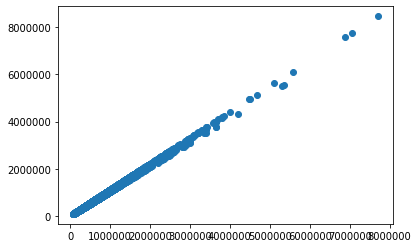

In [38]:
import matplotlib.pyplot as plt
import pandas
plt.scatter(x=df['price'], y=df['price_dec_15'])
plt.show()

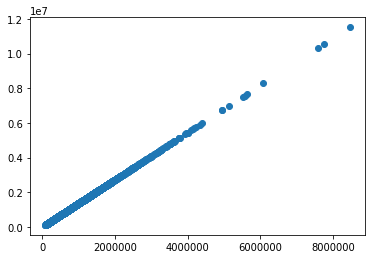

In [39]:
import matplotlib.pyplot as plt
import pandas
plt.scatter(x=df['price_dec_15'], y=df['price_dec_19'])
plt.show()

Remove duplicates, keep the second occurance, the most recent sale

In [40]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,distance to town,date_key,Compounding,Discounting,price_dec_15,price_dec_19
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,7.420145,2014-10-13,1.099314,0.909658,243937.78,331976.86
1,4036801170,10/13/2014,380000.0,4,1.75,1760,7300,1.0,0.0,0.0,...,47.6034,-122.125,1680,7500,9.758523,2014-10-13,1.099314,0.909658,417739.33,568504.77
2,1310900260,10/13/2014,318888.0,4,1.75,2320,12000,1.0,0.0,0.0,...,47.3644,-122.280,2120,9880,16.821582,2014-10-13,1.099314,0.909658,350558.05,477077.23
3,1373800295,10/13/2014,1450000.0,3,3.00,4380,6320,2.0,0.0,3.0,...,47.6452,-122.411,3080,7680,4.522212,2014-10-13,1.099314,0.909658,1594005.34,2169294.52
4,5102400105,10/13/2014,400000.0,4,1.00,1420,4875,1.5,0.0,0.0,...,47.6942,-122.321,1110,5413,6.196370,2014-10-13,1.099314,0.909658,439725.61,598426.07


### Treatment of house with 33 bedrooms. Has 33 bedrooms but a square footage from a 3 bedroom property

In [41]:
# replace 33 with 3
df['bedrooms'].describe()
df['bedrooms'] = df['bedrooms'].replace(33,3)
df['bedrooms'].describe()

count    21597.000000
mean         3.371811
std          0.904096
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

### Drop duplicate ids, keeping the most recent id / sale as most representative of current market

In [42]:
df = df.drop_duplicates(subset='id', keep="last")

In [43]:
len(df)

21420

### Create a csv with standardized variables for regression analysis

In [44]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'distance to town',
       'date_key', 'Compounding', 'Discounting', 'price_dec_15',
       'price_dec_19'],
      dtype='object')

In [45]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler as ss
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import min_max_scaler
from sklearn.preprocessing import MinMaxScaler

In [46]:
df_copy = df.copy()


column_names_to_normalize = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',  'sqft_living15', 'sqft_lot15', 'distance to town']

x = df_copy[column_names_to_normalize].values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df_copy = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df_copy.index)
df_copy[column_names_to_normalize] = df_copy

# transform column names with _std suffix for standardised
df_copy = df_copy.add_suffix('_std')
df_copy

,bedrooms_std,bathrooms_std,sqft_living_std,sqft_lot_std,floors_std,condition_std,grade_std,sqft_above_std,sqft_basement_std,yr_built_std,yr_renovated_std,sqft_living15_std,sqft_lot15_std,distance to town_std
0,0.2,0.066667,0.061503,0.003108,0.0,0.50,0.4,0.089602,0.000000,0.478261,0.478261,0.161934,0.005742,0.141645
1,0.3,0.166667,0.105543,0.004107,0.0,0.50,0.4,0.056416,0.182573,0.486957,0.486957,0.220444,0.007867,0.191062
2,0.3,0.166667,0.148064,0.006954,0.0,0.75,0.5,0.210177,0.010373,0.634783,0.634783,0.296162,0.010601,0.340327
3,0.2,0.333333,0.304480,0.003513,0.4,1.00,0.7,0.355088,0.165975,0.452174,0.452174,0.461366,0.008074,0.080402
4,0.3,0.066667,0.079727,0.002638,0.2,0.50,0.4,0.116150,0.000000,0.260870,0.260870,0.122354,0.005470,0.115783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.1,0.133333,0.034928,0.000303,0.4,0.50,0.4,0.050885,0.000000,0.921739,0.921739,0.074170,0.000836,0.055808
21593,0.2,0.233333,0.202733,0.031367,0.0,0.50,0.6,0.295354,0.000000,0.913043,0.913043,0.287558,0.043592,0.303290
21594,0.3,0.266667,0.110099,0.005234,0.0,0.75,0.4,0.094027,0.124481,0.652174,0.652174,0.251420,0.008040,0.284553
21595,0.2,0.166667,0.105543,0.001817,0.0,0.50,0.4,0.087389,0.124481,0.573913,0.573913,0.247978,0.004996,0.035760


In [47]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,distance to town,date_key,Compounding,Discounting,price_dec_15,price_dec_19
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,7.420145,2014-10-13,1.099314,0.909658,243937.78,331976.86
1,4036801170,10/13/2014,380000.0,4,1.75,1760,7300,1.0,0.0,0.0,...,47.6034,-122.125,1680,7500,9.758523,2014-10-13,1.099314,0.909658,417739.33,568504.77
2,1310900260,10/13/2014,318888.0,4,1.75,2320,12000,1.0,0.0,0.0,...,47.3644,-122.280,2120,9880,16.821582,2014-10-13,1.099314,0.909658,350558.05,477077.23
3,1373800295,10/13/2014,1450000.0,3,3.00,4380,6320,2.0,0.0,3.0,...,47.6452,-122.411,3080,7680,4.522212,2014-10-13,1.099314,0.909658,1594005.34,2169294.52
4,5102400105,10/13/2014,400000.0,4,1.00,1420,4875,1.5,0.0,0.0,...,47.6942,-122.321,1110,5413,6.196370,2014-10-13,1.099314,0.909658,439725.61,598426.07


In [48]:
df_clean = pd.merge(df, df_copy, left_index=True, right_index=True)

In [49]:
df_clean.columns
df_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,floors_std,condition_std,grade_std,sqft_above_std,sqft_basement_std,yr_built_std,yr_renovated_std,sqft_living15_std,sqft_lot15_std,distance to town_std
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,0.50,0.4,0.089602,0.000000,0.478261,0.478261,0.161934,0.005742,0.141645
1,4036801170,10/13/2014,380000.0,4,1.75,1760,7300,1.0,0.0,0.0,...,0.0,0.50,0.4,0.056416,0.182573,0.486957,0.486957,0.220444,0.007867,0.191062
2,1310900260,10/13/2014,318888.0,4,1.75,2320,12000,1.0,0.0,0.0,...,0.0,0.75,0.5,0.210177,0.010373,0.634783,0.634783,0.296162,0.010601,0.340327
3,1373800295,10/13/2014,1450000.0,3,3.00,4380,6320,2.0,0.0,3.0,...,0.4,1.00,0.7,0.355088,0.165975,0.452174,0.452174,0.461366,0.008074,0.080402
4,5102400105,10/13/2014,400000.0,4,1.00,1420,4875,1.5,0.0,0.0,...,0.2,0.50,0.4,0.116150,0.000000,0.260870,0.260870,0.122354,0.005470,0.115783


Save final cleaned data file to csv file.  This csv will be pulled into regression analysis sheet as the first step 

In [50]:
df_clean.to_csv('kc_housing_data_cleaned_final.csv')